# 📊 Predicción de Rotación de Empleados (Employee Churn Prediction)

## 📁 Fuente del dataset

Este análisis se basa en el dataset **IBM HR Analytics Employee Attrition & Performance**, disponible públicamente en [Kaggle](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).  
Contiene información de 1,470 empleados de IBM, con variables relacionadas al desempeño, satisfacción laboral, ingreso, antigüedad, entre otros factores relevantes para la rotación de personal.

---

## 📘 Descripción del proyecto

El objetivo de este proyecto es aplicar técnicas de ciencia de datos y aprendizaje automático para predecir qué empleados tienen mayor probabilidad de dejar la empresa (rotación o "churn"). Para ello, se realiza un análisis exploratorio del dataset, procesamiento de variables, construcción de modelos predictivos y evaluación de resultados.

Este tipo de análisis es muy útil para el área de Recursos Humanos, ya que permite anticipar posibles renuncias y tomar decisiones informadas para retener talento clave dentro de la organización.

---

## 🎯 Objetivos específicos

- Analizar las variables que influyen en la decisión de un empleado de renunciar.
- Construir un modelo de clasificación que prediga la rotación de empleados.
- Evaluar el rendimiento del modelo y las variables más influyentes.
- Proponer recomendaciones basadas en los resultados para mejorar la retención laboral.


### 1️⃣ Importar librerías y cargar datos

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos (ajusta ruta si es necesario)
df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')


### 2️⃣Codificar variables categóricas

In [2]:
df_encoded = df.copy()

# Convertir la columna objetivo a binaria
df_encoded['Attrition'] = df_encoded['Attrition'].map({'Yes': 1, 'No': 0})

# Identificar columnas categóricas (excepto Attrition que ya está codificada)
cat_cols = df_encoded.select_dtypes(include='object').columns.drop('Attrition', errors='ignore')

# Usar LabelEncoder para codificarlas
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


### 3️⃣Separar variables predictoras y objetivo

In [3]:
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']


### 4️⃣Dividir en entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


### 5️⃣Entrenar modelo (Random Forest)

In [5]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 6️⃣Evaluar el modelo

Accuracy: 0.8299319727891157

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.38      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.62      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



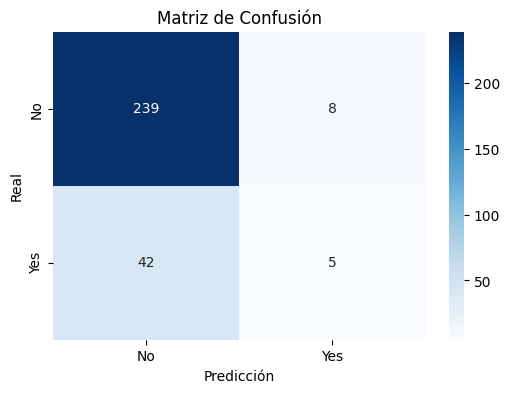

In [6]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


### 7️⃣Importancia de variables

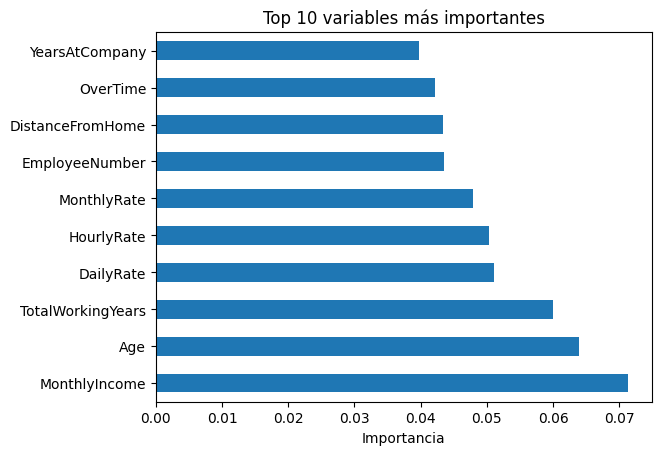

In [7]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 variables más importantes")
plt.xlabel("Importancia")
plt.show()


## 📌 Conclusiones del Modelo de Predicción de Rotación de Empleados

El modelo de **Random Forest Classifier** alcanzó un **accuracy del 82.99%** sobre el conjunto de prueba. A pesar de ser un buen valor general, es importante mirar otras métricas dado que el dataset está desbalanceado.

### 🔍 Informe de clasificación:

- La clase **"No renuncia" (0)** tiene una excelente **precisión (0.85)** y **recall (0.97)**.
- La clase **"Sí renuncia" (1)** tiene valores muy bajos: **precision de 0.38**, **recall de 0.11**, con un **f1-score de 0.17**.

Esto indica que el modelo tiene dificultad para detectar correctamente a los empleados que efectivamente renuncian, probablemente por el desbalance de clases (solo ~16% renuncia en el dataset original).

La matriz de confusión confirma este problema: el modelo predice que la mayoría de empleados no renunciará, y casi no detecta a los que sí lo hacen.

---

## 💡 Recomendaciones técnicas

- Manejar el desbalance de clases con técnicas como:
  - `class_weight='balanced'` en el modelo
  - Resampling (SMOTE, undersampling)

- Probar otros algoritmos como **XGBoost** o **Logistic Regression** para comparar resultados.

- Evaluar el modelo con **ROC-AUC** para ver su capacidad de discriminación entre clases.

---

## 📊 Variables más importantes

Según la importancia de características del modelo, las **10 variables que más influyen** en la predicción de rotación son:

- `OverTime` (horas extra)
- `MonthlyIncome` (ingreso mensual)
- `TotalWorkingYears`
- `JobLevel`
- `YearsAtCompany`
- `Age`
- `DistanceFromHome`
- `YearsInCurrentRole`
- `StockOptionLevel`
- `PercentSalaryHike`

Estas variables ofrecen señales valiosas para el área de Recursos Humanos.

---

## 🧠 Conclusión de negocio

- El modelo puede servir como **herramienta de apoyo para identificar patrones de riesgo**, aunque todavía necesita mejorar su sensibilidad hacia los empleados que renuncian.

- Las empresas pueden enfocarse en **revisar condiciones laborales de empleados con muchas horas extra, bajos sueldos o poca antigüedad**, ya que estos parecen ser factores rele


---

📌 Proyecto desarrollado por: **Nabila Isabel Padilla Resendiz**  
🎓 Data Scientist en formación | Ingeniera en Mecatrónica | Apasionada por la tecnología y el aprendizaje  
📬 Contacto: https://www.linkedin.com/in/nabilap/  
